In [110]:
import pandas as pd
import numpy as np
import re
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
from textblob import Word
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import shuffle
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding
from tensorflow.keras.optimizers import Adam

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Xiche\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Xiche\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
cols = ['sentiment','id','date','query','user','text']
df = pd.read_csv("C:/Users/Xiche/Downloads/training.csv",encoding= "latin",names=cols)
df.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
#preprocessing

df.drop(columns=['id', 'date', 'query'], axis=1, inplace=True)

In [6]:
print(max(df.text.str.len()))
print(sum(df.text.str.len()>280))
df = df.drop(df[df.text.str.len()>280].index).reset_index(drop=True)

374
18


In [7]:
df['text'] = df['text'].str.lower()
df.head()

,sentiment,user,text
0,0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,scotthamilton,is upset that he can't update his facebook by ...
2,0,mattycus,@kenichan i dived many times for the ball. man...
3,0,ElleCTF,my whole body feels itchy and like its on fire
4,0,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
df['text'] = df['text'].apply(lambda x: re.sub(r"\S*https?:\S*", "",x))
df.head()

,sentiment,user,text
0,0,_TheSpecialOne_,"@switchfoot - awww, that's a bummer. you sho..."
1,0,scotthamilton,is upset that he can't update his facebook by ...
2,0,mattycus,@kenichan i dived many times for the ball. man...
3,0,ElleCTF,my whole body feels itchy and like its on fire
4,0,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
df['text'] = df['text'].apply(lambda t: re.sub('@[^ ]+|#[^ ]+', '', t))
df.head()

,sentiment,user,text
0,0,_TheSpecialOne_,"- awww, that's a bummer. you shoulda got da..."
1,0,scotthamilton,is upset that he can't update his facebook by ...
2,0,mattycus,i dived many times for the ball. managed to s...
3,0,ElleCTF,my whole body feels itchy and like its on fire
4,0,Karoli,"no, it's not behaving at all. i'm mad. why am..."


In [10]:
df['text'] = df['text'].str.replace('[^A-Za-z0-9 ]', "")
df.head()

,sentiment,user,text
0,0,_TheSpecialOne_,awww thats a bummer you shoulda got david ...
1,0,scotthamilton,is upset that he cant update his facebook by t...
2,0,mattycus,i dived many times for the ball managed to sa...
3,0,ElleCTF,my whole body feels itchy and like its on fire
4,0,Karoli,no its not behaving at all im mad why am i he...


In [11]:
stopword = stopwords.words('english')
stopword.append('im')
print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
df['text'] = df['text'].apply(lambda t: " ".join(word for word in t.split() if word not in stopword))
df.head()

,sentiment,user,text
0,0,_TheSpecialOne_,awww thats bummer shoulda got david carr third...
1,0,scotthamilton,upset cant update facebook texting might cry r...
2,0,mattycus,dived many times ball managed save 50 rest go ...
3,0,ElleCTF,whole body feels itchy like fire
4,0,Karoli,behaving mad cant see


In [13]:
#Stemming
PS = PorterStemmer()
df['text'].apply(lambda t: " ".join([PS.stem(word) for word in t.split()]))

0          awww that bummer shoulda got david carr third day
1          upset cant updat facebook text might cri resul...
2            dive mani time ball manag save 50 rest go bound
3                            whole bodi feel itchi like fire
4                                         behav mad cant see
                                 ...                        
1599977                           woke school best feel ever
1599978               thewdbcom cool hear old walt interview
1599979                         readi mojo makeov ask detail
1599980    happi 38th birthday boo alll time tupac amaru ...
1599981                                                happi
Name: text, Length: 1599982, dtype: object

In [20]:
#Lemmatization
df['text'] = df['text'].apply(lambda t: " ".join([Word(word).lemmatize() for word in t.split()]))
df.head()

,sentiment,user,text
0,0,_TheSpecialOne_,awww thats bummer shoulda got david carr third...
1,0,scotthamilton,upset cant update facebook texting might cry r...
2,0,mattycus,dived many time ball managed save 50 rest go b...
3,0,ElleCTF,whole body feel itchy like fire
4,0,Karoli,behaving mad cant see


In [21]:
df['token'] = df['text'].apply(lambda x:str(x).split())

In [22]:
#Tokenization
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['text'].values.astype('U'))

In [23]:
#SpliteTrainTest
from sklearn.model_selection import train_test_split
X=text_counts
y=df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

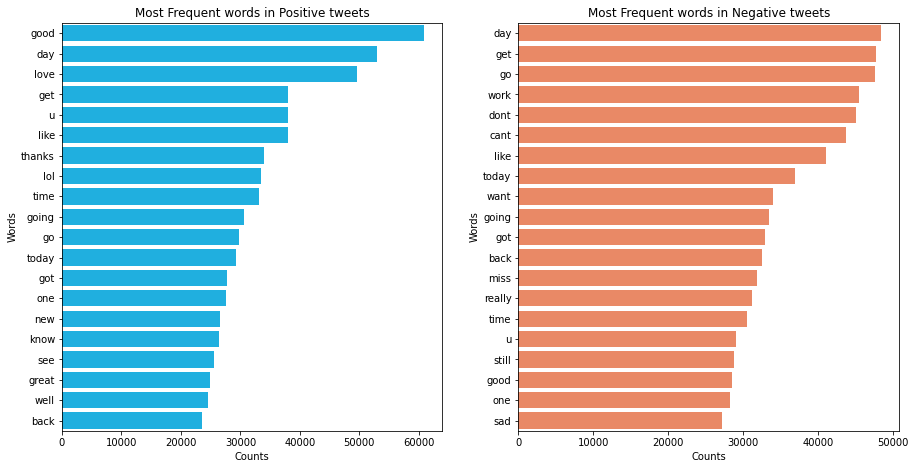

In [24]:
#DataVisualization

# embedding

top_pos = Counter([word for text in df['token'].loc[df.sentiment==4] for word in text])
top_pos_df=pd.DataFrame(top_pos.most_common(100),columns=['Words','Counts'])

top_neg = Counter([word for text in df['token'].loc[df.sentiment==0] for word in text])
top_neg_df=pd.DataFrame(top_neg.most_common(100),columns=['Words','Counts'])
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,7.5))
sns.barplot(y='Words',x='Counts',data=top_pos_df[:20],color='deepskyblue',ax=ax[0])
sns.barplot(y='Words',x='Counts',data=top_neg_df[:20],color='coral',ax=ax[1])
ax[0].set_title("Most Frequent words in Positive tweets")
ax[1].set_title("Most Frequent words in Negative tweets")
plt.show()

In [25]:

# Evaluation

def model_Evaluate(model):
   
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
   
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.76      0.78      0.77    159873
           4       0.77      0.75      0.76    160124

    accuracy                           0.77    319997
   macro avg       0.77      0.77      0.77    319997
weighted avg       0.77      0.77      0.77    319997



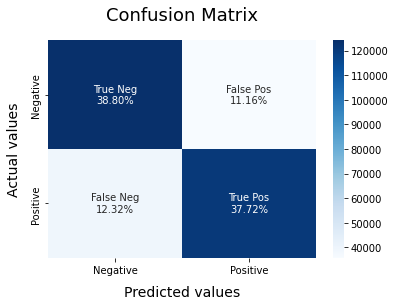

In [26]:
# Models


#Naive Bayes
cnb = ComplementNB()
cnb.fit(X_train, y_train)
cross_cnb = cross_val_score(cnb, X, y,n_jobs = -1)
model_Evaluate(cnb)

              precision    recall  f1-score   support

           0       0.79      0.75      0.77    159873
           4       0.76      0.80      0.78    160124

    accuracy                           0.77    319997
   macro avg       0.77      0.77      0.77    319997
weighted avg       0.77      0.77      0.77    319997



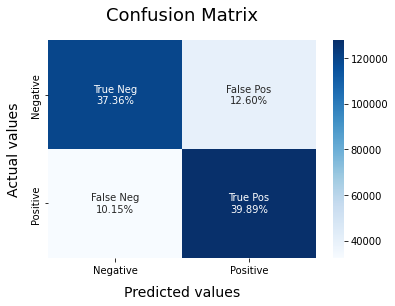

In [27]:
# logistic regression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

In [102]:
#LSTM

X=df['text']
y=df['sentiment']
y = y.replace({4: 1, 0: 0})
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X, y, test_size=0.1,random_state=44)



In [103]:
from gensim.models import Word2Vec

Embedding_dimensions = 100

# Creating Word2Vec training dataset.
Word2vec_train_data = list(map(lambda x: x.split(), X_train_lstm))

In [104]:
%%time

# Defining the model and training it.
word2vec_model = Word2Vec(Word2vec_train_data,
                 vector_size=Embedding_dimensions,
                 workers=8,
                 min_count=5)

print("Vocabulary Length:", len(word2vec_model.wv.key_to_index))

Vocabulary Length: 49726
Wall time: 26.7 s


In [105]:
vocab_length = 60000

tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(X_train_lstm)
tokenizer.num_words = vocab_length
print("Tokenizer vocab length:", vocab_length)

Tokenizer vocab length: 60000


In [106]:
input_length = 60

X_train_lstm = pad_sequences(tokenizer.texts_to_sequences(X_train_lstm), maxlen=input_length)
X_test_lstm  = pad_sequences(tokenizer.texts_to_sequences(X_test_lstm) , maxlen=input_length)

print("X_train.shape:", X_train_lstm.shape)
print("X_test.shape :", X_test_lstm.shape)

X_train.shape: (1439983, 60)
X_test.shape : (159999, 60)


In [107]:
embedding_matrix = np.zeros((vocab_length, Embedding_dimensions))

for word, token in tokenizer.word_index.items():
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (60000, 100)


In [108]:
def getModel():
    embedding_layer = Embedding(input_dim = vocab_length,
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix],
                                input_length=input_length,
                                trainable=False)

    model = Sequential([
        embedding_layer,
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Conv1D(100, 5, activation='relu'),
        GlobalMaxPool1D(),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid'),
    ],
    name="Sentiment_Model")
    return model

In [112]:
training_model = getModel()
training_model.summary()

Model: "Sentiment_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 60, 100)           6000000   
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 60, 200)           160800    
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 60, 200)           240800    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 56, 100)           100100    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                1616      
_________________________________________________________________
dense_12 (Dense)             (None, 1)             

In [113]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
             EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [114]:
training_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [115]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Training on GPU...


In [116]:
history = training_model.fit(
    X_train_lstm, y_train_lstm,
    batch_size=1024,
    epochs=12,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1,
)

Epoch 1/12
1266/1266 [==============================] - 262s 203ms/step - loss: 0.4946 - accuracy: 0.7572 - val_loss: 0.4457 - val_accuracy: 0.7899
Epoch 2/12
1266/1266 [==============================] - 256s 202ms/step - loss: 0.4546 - accuracy: 0.7832 - val_loss: 0.4371 - val_accuracy: 0.7966
Epoch 3/12
1266/1266 [==============================] - 256s 202ms/step - loss: 0.4432 - accuracy: 0.7906 - val_loss: 0.4294 - val_accuracy: 0.8009loss: 0.4433 - - ETA: 23s - loss: 0.4433 - accuracy: 0. - ETA: 23s - loss: 0.4433 -  - ETA: 20s - loss: 0.44
Epoch 4/12
1266/1266 [==============================] - 256s 202ms/step - loss: 0.4363 - accuracy: 0.7941 - val_loss: 0.4267 - val_accuracy: 0.8022
Epoch 5/12
1266/1266 [==============================] - 257s 203ms/step - loss: 0.4333 - accuracy: 0.7965 - val_loss: 0.4246 - val_accuracy: 0.8037
Epoch 6/12
1266/1266 [==============================] - 256s 202ms/step - loss: 0.4294 - accuracy: 0.7987 - val_loss: 0.4227 - val_accuracy: 0.8055
Epoc

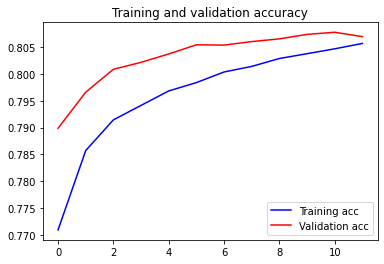

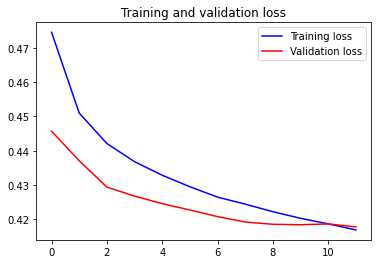

In [117]:
#History for accuracy
acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [118]:
# Predicting on the Test dataset.
y_pred_lstm = training_model.predict(X_test_lstm)

# Converting prediction to reflect the sentiment predicted.
y_pred_lstm = np.where(y_pred_lstm>=0.5, 1, 0)

print(classification_report(y_test_lstm, y_pred_lstm))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80     79784
           1       0.80      0.81      0.81     80215

    accuracy                           0.81    159999
   macro avg       0.81      0.81      0.81    159999
weighted avg       0.81      0.81      0.81    159999



Text(0.5, 1.0, 'Confusion Matrix')

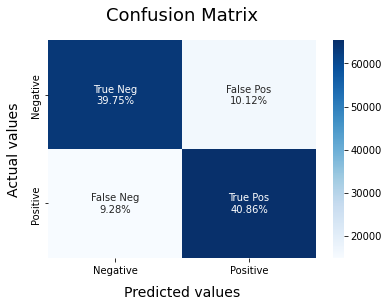

In [119]:
# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test_lstm, y_pred_lstm)

categories  = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
            xticklabels = categories, yticklabels = categories)

plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)